# EXPLORATORY DATA ANALYSIS (EDA) WITH PYTHON

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an essential initial phase in the data analysis process. It involves a comprehensive exploration of the dataset to understand its structure, patterns, and relationships. EDA aims to gain insights into the data's characteristics, identify potential issues or anomalies, and formulate hipotheses for further analysis.

## Key aspects of EDA
### Understanding the dataset
EDA starts by gaining a holistic understanding of the dataset's dimensions, data types, and basic statistics. This includes knowing the number of observations (rows) and variables (columns), as well as calculating summary statistics like mean, median, minimum, maximum, and standard deviation.
### Data cleaning and preprocessing
EDA often involves data cleaning tasks to ensure data quality and consistency. This includes handling missing values, correcting data types, dealing with outliers, and performing transformations or scaling as necessary. Clean and well-preprocessed data is crucial for meaningful analysis.
### Univariate Analysis
In this phase, each variable in the dataset is analyzed individually. Numerical variables are explored using histograms, box plots, or summary statistics, while categorical variables are examined through frequency tables, bar charts, or pie charts. Univariate analysis helps understand the distribution and characteristics of individual variables.
### Bivariate and Multivariate Analsys
Bivariate analysis focuses on exploring relationships between pairs of variables, such as correlations between numerical variables or associations between categorical variables. Multivariate analysis extends this to examine relationships involving three or more variables simultaneously, uncovering complex patterns and dependencies within the data.
### Visualization
Visualization is a crucial aspect of EDA, allowing analyst to visually represent data distributions, trends, correlations, outliers, and clusters. Various plots and charts, such as scatter plots, heatmaps, line graphs, and box plots, are used to create meaningul visualizations that aid in understanding and interpreting the data.
### Hipothesis Generation
EDA often leads to the generation of hypotheses or initial insights about the data. These hypotheses can be tested further using statistical tests, hypothesis testing, or machine learning models in subsequent stages of analysis.

Overall, EDA serves as foundational step in data analysis projects, providing valuable insights that guide subsequent analysis, modeling, and decision-making processes. It helps uncover hidden patterns, outliers, trends, and relationships within the data, ultimately leading to more informed and data-driven conclusions.

## Project Objectives
- Explore features or characteristics to predict price of a car
- Analyze patterns and run descriptive statistical analysis
- Group data based on indentified parameters and create pivot tables
- Identify the effect of independent attributes on price of cars

### Problem
What are the main characteristics that have the most impact on the car price?

### 1. Load the data into Pandas data frame

In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
# Ignore Warnings: Ignore the warnign message to keep EDL notebook clean
import warnings
warnings. filterwarnings('ignore')

In [3]:
# Load the data and stor it in dataframe df
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 2. Analyzing indiviual feature patterns using visualization

In [4]:
# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly below the code cell
%matplotlib inline 

#### How to choose the right visualization method?
When visualiizing individual variables, it is important to first undertand what type of variable you are delaing with. This will help us find the right visualization method for that variable.

In [5]:
# List the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [6]:
# Show the datatype of scpecific column
df['peak-rpm'].dtype

dtype('float64')

#### Correlation

In [7]:
# Show correlation between all variables (Error)
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [8]:
# Correlation between selected variables
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Continuos Numerical variables
- Scatterplots with fitted line
- regplot
- Linear relationship
- Linear regression model

This variables mainly contain any value within some range. They can be of type 'int64' or 'float64'. A great way to visualize these variable sis by using scatterplots with fitted lines.

In order to start understanding the linear relationship between and indiciual variable and the price, we can use 'regplot' which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizign the fit of the simple linear regression model as well.

### Positive linear relationship

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


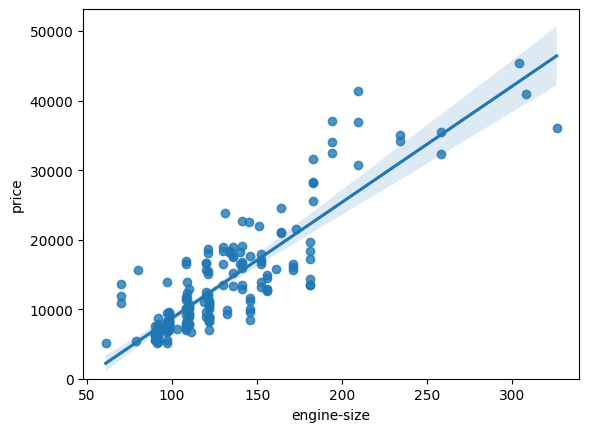

In [9]:
# Find the scatteplot of 'engine-size' and 'price'
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

# Correlation between these two variables
df[['engine-size','price']].corr()

As the engine-size goes up, the price goes up. This indicates a positive direct correlation between these two variables. The engine size seems a pretty good predictor of price since the regression line is almost a perfect diagonal line.

### Negative linear relationship

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


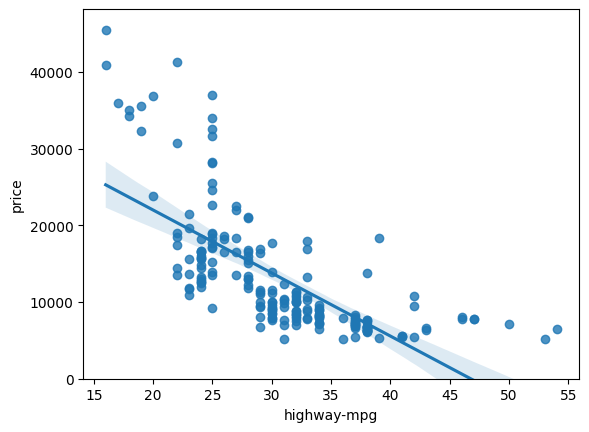

In [10]:
# Lets try with Highway mpg as potential predictor variable of price
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

# Correlation 
df[['highway-mpg','price']].corr()

As highway-mpg goes up, price goes down: this indicates an inverse/negative relationship between these two variables. So it could be a potential predictor of price.

### Weak linear relationship
Peak rpm does not seem like a good predictor of the price at all since we will see that the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable. The correlation is very low. Same situation happens for stroke variable.

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


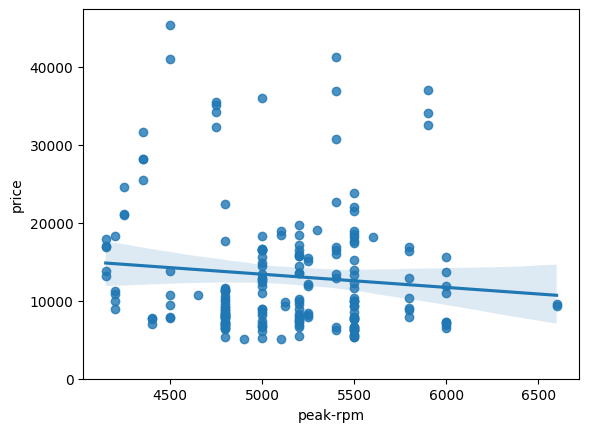

In [11]:
# Plot regresion line and correlation
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

# Correlation 
df[['peak-rpm','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


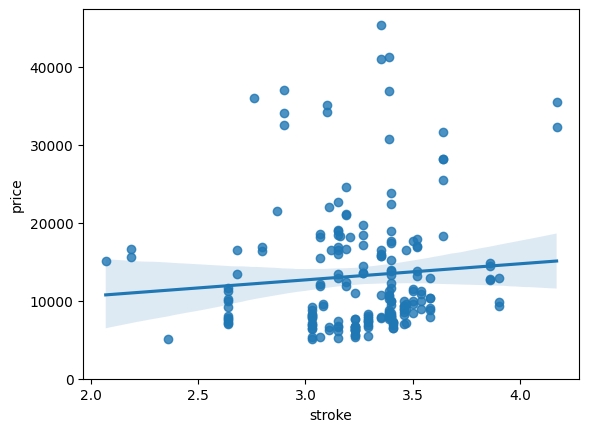

In [12]:
# Plot regresion line and correlation
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0,)

# Correlation 
df[['stroke','price']].corr()

## Categorical Variables
### boxplot
These are variables that describe a characteristic of a data unit, and are selected from a small group of categories. The categorical varialbes can have the type 'object' or 'int64'. A good way to visualize them is by using boxplot.

<Axes: xlabel='body-style', ylabel='price'>

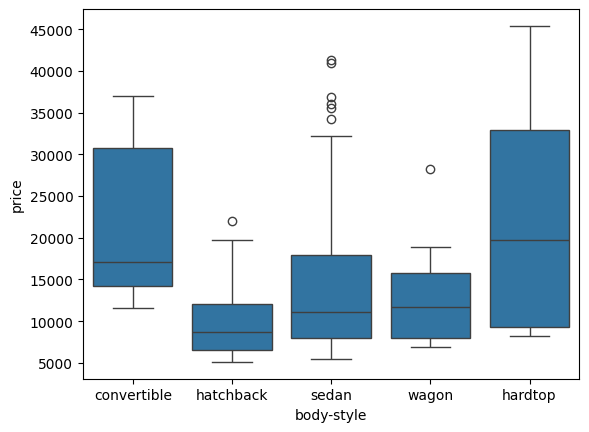

In [13]:
# body style and price relationship
sns.boxplot(x='body-style', y='price', data=df)

We see that the distributions of price between the different body style categories have a significan overlap, so it wont be a good predictor of price.

<Axes: xlabel='engine-location', ylabel='price'>

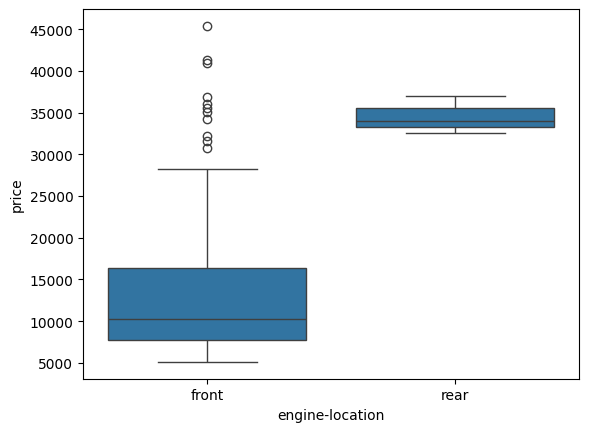

In [14]:
# engine location and price
sns.boxplot(x='engine-location', y='price', data=df)

Here we see that the distribution of price between these two categories, are distinct enough to take engine location as potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

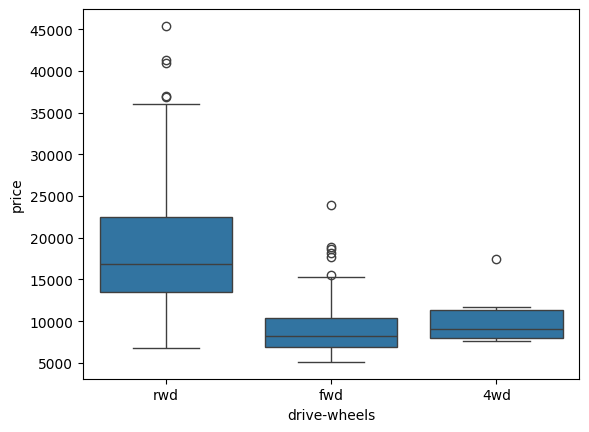

In [15]:
# drive wheels and price
sns.boxplot(x='drive-wheels', y='price', data=df)

It could be a potential good predictor of price.

### 3. Descriptive Statistical Analysis
Lets first take a look at the variables by utilizing a description method. 
The describe function automatically computes basic statistic for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show: Count, mean, standard deviation (std), min, IQR (Interquartile range: 25, 50, 75%) and max.

In [16]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of 'describe' skips variables of type object. We can apply the method on them as follows:

In [17]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Value counts
Value counts is a good way of understanding how many units of each characteristic/variable we have. The method only works on pandas series, not pandas dataframes. As a result, we only includ eone bracket, not two.

In [18]:
# Apply the method value_counts() to drive-wheels
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [19]:
# Convert the series to a dataframe
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [20]:
# Drive whees and value counts dataframe transformation
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'count': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [21]:
# Do the same for engine location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'count': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are nto able to draw any conclusions about the engine location.

### 4. Basic of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.
For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [22]:
# Group by categories the drive-wheels
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group the variable and then average them.
We can select the columns 'drive-wheels', 'body-style', and 'price', then assign it to the varialbe "df_group_one".

In [23]:
# Select drive-wheels, body style and price columns into a new df
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [24]:
# Group results
df_group_one = df_group_one.groupby('drive-wheels')['price'].mean().round(2).to_frame()

In [25]:
# Rename column name price to mean price
df_group_one.rename(columns={'price':'mean_price'}, inplace=True)

From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are appoximately the same in price.

#### Group by multiple variables / Pivot table
You can also group by multiple variables. For example, let's group by both dw and bs in unique combination of df and store the result in anew variable.

In [26]:
# Grouping dw and bs 
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the df to a pivot table from groups using the method 'pivot'.
 I this case, we will leave the drive-wheels variables as the rows of the table, and pivot body-style to become the columns of the table:

In [27]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cell with value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire couse on its own.

In [28]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
# Group by the body style and the price
df_gptest2 = df[['body-style','price']]
grouped_rest_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_rest_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Variables: Drive Wheels and Body Style vs. Price
Let's use a heatmap to visualize the relationship between bs vs price

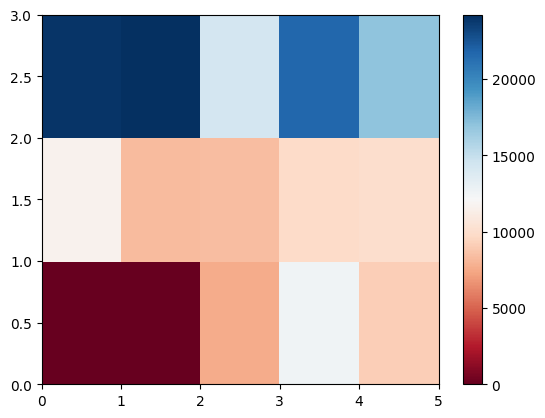

In [30]:
# use the grouped results to generate heatmat of dw and bs vs price (color)
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

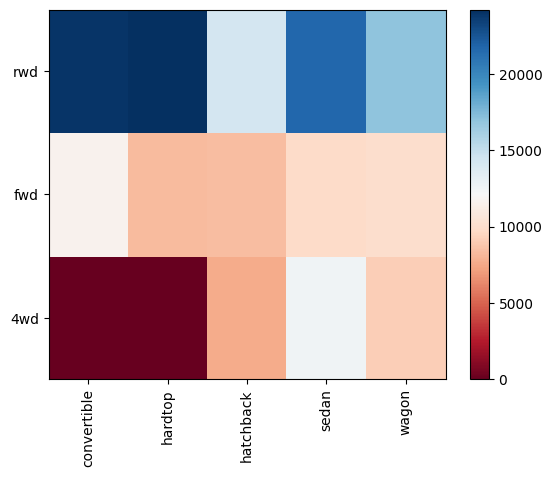

In [31]:
# Change the information to proper labels and titels
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and lables to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The main question we want to answer in this module is "What are the main charecteristics which have the most impact on the car price?".
To get a better meausre of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?

### 5. Correlation and Causation
- Correlation: A measure of the extent of interdependence between variables.
- Causation: The relationship between cause and effect between two variables.

It is important to know the difference these two. Correlation does not imply causation. Determining correlation is much simpler than determining cuasation that may require independent experimentation.

#### Pearson Correlation
The PC measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- 1: Perfect positive linear correlation
- 0: No linear correlation, the two variables most likely do not affect each other
- -1: Perfect negative linear correlation

PC is the default method of the function"corr"

In [32]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Text(0.5, 1.0, 'Correlation Heatmap')

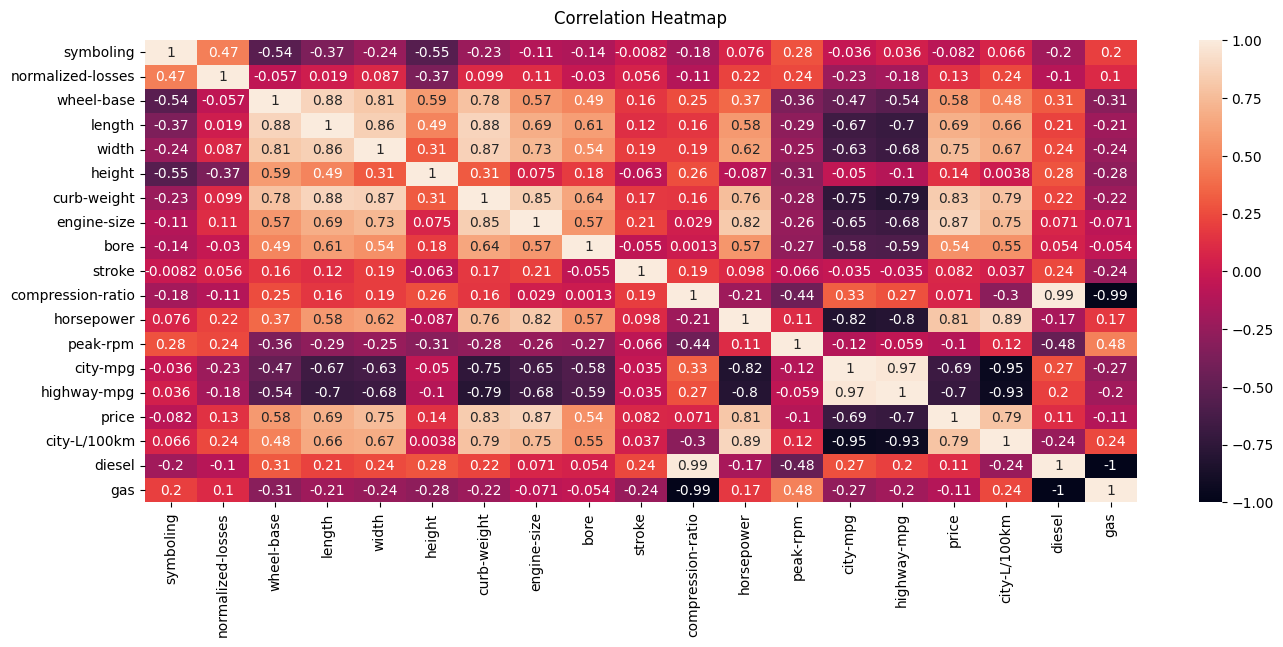

In [33]:
# Heatmap of correlation

# Increase size of the heatmap
plt.figure(figsize=(16,6))

# Store heatmap object in a variable to access it to include more feautres
# Set range of values to display in the color map
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)#, cmap='BrBG')

# Give the titlle to the heatmap and define distance
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Save figure: dpi (resolution dots/inches), bbox_inches = 'tight' (not allow labels to be cropped)
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

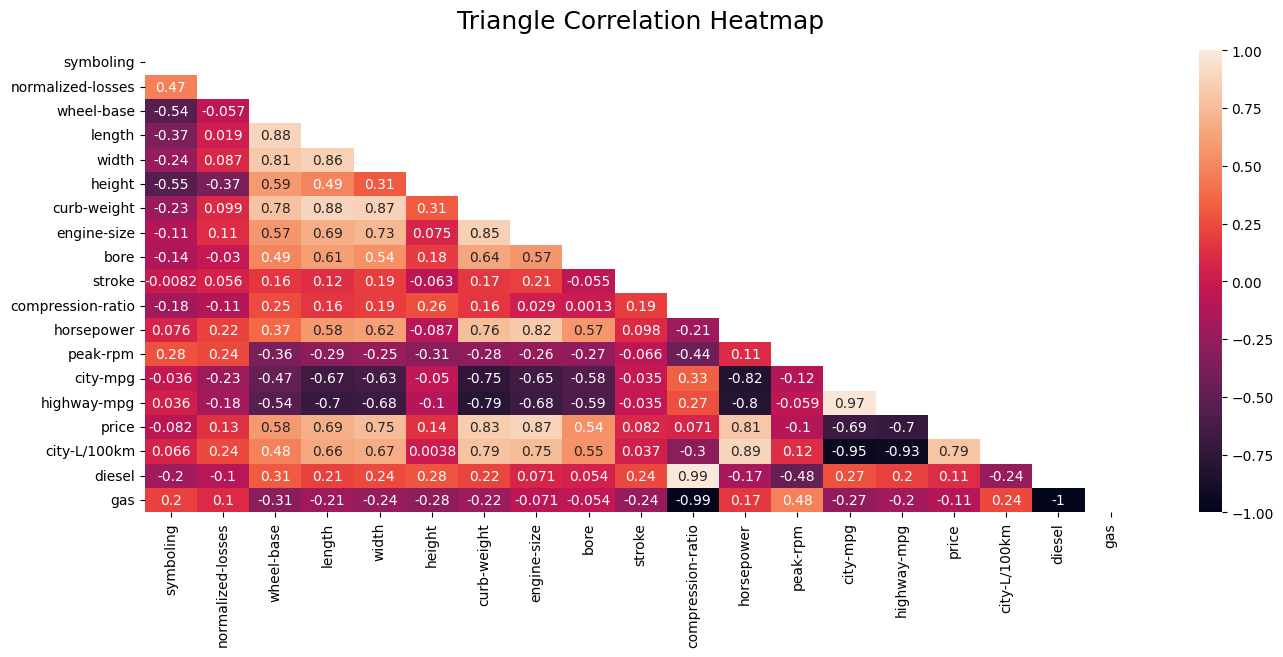

In [34]:
# Trinagle Correlation heatmap: make a mask of 1,0 to only show the lower diagonal
plt.figure(figsize=(16, 6))

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=np.bool))

# Set the heatmap as before
heatmap = sns.heatmap(df.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True)#, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Correlation of independen variables with dependent variables
We want to create a colored map that shows the stregth of the correlation between every independent variable that we want to include in our model and the dependent variable.

In [35]:
#df.corr(numeric_only=True)[['Price']].sort_values(by='Price', ascending=False)

In [36]:
#plt.figure(figsize=(8, 12))
#heatmap = sns.heatmap(df.corr(numeric_only=True)[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

#### P-Value
Probability value that the correlation between two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that wea re 95% confident that the correlation between the variables is significant.
By convention, when the
- p-value is << 0.001 there is a strong evidence that the correlation is significant.
- p-value is << 0.05 there is a moderate evidence that the correlation is significant.
- p-value is << 0.1 there is a weak evidence that the correlation is significant.
- p-value is >> 0.1 there is no evidence that the correlation is significant.

In [37]:
# Wheel-Base vs. Price
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.585 Weak

The Pearson Correlation Coefficient:  0.5846418222655081
P = 8.076488270732847e-20
P = 0.00000000000000000008


Conclusion: Since p-value is <<  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (0.585)

In [38]:
# Horsepower vs. Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.809 Srong

The Pearson Correlation Coefficient:  0.809574567003656
P = 6.369057428259638e-48
P = 0.00000000000000000000


In [39]:
# Length vs. Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.691 Moderate

The Pearson Correlation Coefficient:  0.690628380448364
P = 8.016477466158899e-30
P = 0.00000000000000000000


In [40]:
# Width vs. Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.751 Strong

The Pearson Correlation Coefficient:  0.7512653440522674
P = 9.200335510481227e-38
P = 0.00000000000000000000


In [41]:
# Curb-Weigth vs. Price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.834 Strong

The Pearson Correlation Coefficient:  0.8344145257702845
P = 2.189577238893924e-53
P = 0.00000000000000000000


In [42]:
# Engine-size vs. Price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.872 Strong

The Pearson Correlation Coefficient:  0.8723351674455185
P = 9.26549162219869e-64
P = 0.00000000000000000000


In [43]:
# Bore vs. Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = 0.521 Moderate

The Pearson Correlation Coefficient:  0.5431553832626603
P = 8.049189483935274e-17
P = 0.00000000000000008049


In [44]:
# City-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = -0.686 Moderate (negative)

The Pearson Correlation Coefficient:  -0.6865710067844679
P = 2.3211320655675065e-29
P = 0.00000000000000000000


In [45]:
# Highway-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient: ", pearson_coef)
print("P =", p_value)
print("P =", format(p_value, '.20f')) 

# p-value << 0.001  --> Correlation between wb and price statistically significant
# Linear relationship = -0.704 Moderate strong (negative)

The Pearson Correlation Coefficient:  -0.7046922650589529
P = 1.7495471144476634e-31
P = 0.00000000000000000000


## Conclusion: Important variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables.

- Continuous numerical variables: Lenght, Width, Curb-weight, Engine-size, Horsepower, City-mpg, Highway-mpg, Wheel-base and Bore.
- Categorical variables: Drive-wheels.

This gives us information to go to next steps such as building a ML model to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prodeiction performance.